# Linear Regression
For this tutorial, we hope to gain some intution on what linear regression is doing.

In [15]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib widget
%matplotlib inline
import numpy as np

from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint

# Setting up random generator
Reproducibility is important when we want to present our works.  
In ML, it is really hard to reproduce results, but we can at least try minimizing randomness by fixing seeds!

In [16]:
# Set seed for reproducibility.
seed = 0
np.random.seed(0)

# This cell should always output the same value!
print("Test random seed: {}".format(np.random.uniform()))

Test random seed: 0.5488135039273248


# 1D Linear Regression
## Generate Training Data
We define the source of training data.  
Realistically, we will not have usually access to real data distribution.  Rather, our job is to learn such a model from training data.

We model the source as a random variable since there is measurement error while observing the data!  
**QUESTION**: What happens if the noise is really strong?

**NOTE**: A good practice is to always visualize our data first! This gives us knowledge about what to expect when our trained model does not perform as wanted.

In [17]:
def generate_data(x, w=np.array([[3], [2]]), noise_mean=0, noise_variance=1):
    """ This the ground truth distribution (linear function) used for generating training set (maybe test set).
    Args:
    - x (ndarray (Shape: (N, 1))): A N-column vector corresponding to the inputs.
    - w (ndarray (Shape: (2, 1))): A 2-column vector corresponding to the parameters of the linear function.
    - noise_mean (float): The mean of a Guassian distribution describing measurement noise.
    - noise_variance (float): The variance of a Guassian distribution describing measurement noise.
    
    Output:
    - y (ndarray (Shape: (N, 1))): A N-column vector corresponding to the outputs given the inputs.
    """
    num_samples = x.shape[0] 
    
    # Generate noise
    noise = np.random.normal(loc=noise_mean, scale=noise_variance, size=x.shape)
    print(noise)
    
    # Pad 1's for the bias term
    x = np.hstack((np.ones((num_samples, 1)), x))
    # Compute outputs y
    y = np.matmul(x, w) + noise
    
    return y


[[3]
 [2]]
[[ 0.74159174]
 [ 1.55291372]
 [-2.2683282 ]
 [ 1.33354538]
 [-0.84272405]
 [ 1.96992445]
 [ 1.26611853]
 [-0.50587654]
 [ 2.54520078]
 [ 1.08081191]]
[(0, 3.7415917408091612),
 (1, 6.552913721912816),
 (2, 4.731671798819626),
 (3, 10.333545381621896),
 (4, 10.157275946170714),
 (5, 14.969924447869895),
 (6, 16.266118529857778),
 (7, 16.49412346023949),
 (8, 21.545200778471052),
 (9, 22.080811913055445)]


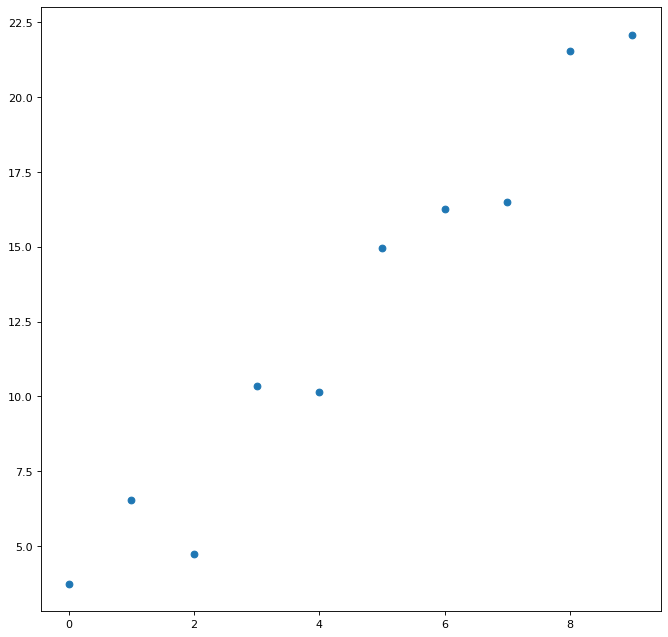

In [18]:
# Let's generate some training data and visual it
true_w = np.array([[3], [2]])
noise_mean = 0
noise_variance = 1

# Generate training data
x = np.expand_dims(np.arange(10), axis=1)
print(true_w)
y = generate_data(x=x,
                w=true_w,
                noise_mean=noise_mean,
                noise_variance=noise_variance)

# Visualize the dataset
pprint([(input.item(), output.item()) for input, output in zip(x, y)])


fig1 = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y)
plt.show()

## Learn the optimal parameters given training data
We now train our linear model based on the training data generated previously.  

In [19]:
def find_optimal_parameters(x, y):
    """ Compute closed form solution for linear regression!
    Optimal weight w* in linear regression is given by w* = (X^T X)^(-1) X^T Y
    
    Args:
    - x (ndarray (Shape: (N, D))): A NxD matrix corresponding to the inputs.
    - y (ndarray (Shape: (N, 1))): A N-column vector corresponding to the outputs given the inputs.
    
    Output:
    - w (ndarray (Shape: (D, 1))): A D-column vector corresponding to the bias and weights of the linear model.
    """
    # Pad 1's for the bias term, Why?
    x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Note that we could use pseudoinverse here instead: np.linalg.pinv
    # @ is alias for matmul
    p1 = np.linalg.inv(x.T @ x) # (X^T X) inverse
    p2 = x.T @ y # X^T Y
    w = p1 @ p2
    return w

w = find_optimal_parameters(x, y)
print(w)


[[3.10309185]
 [2.12982798]]


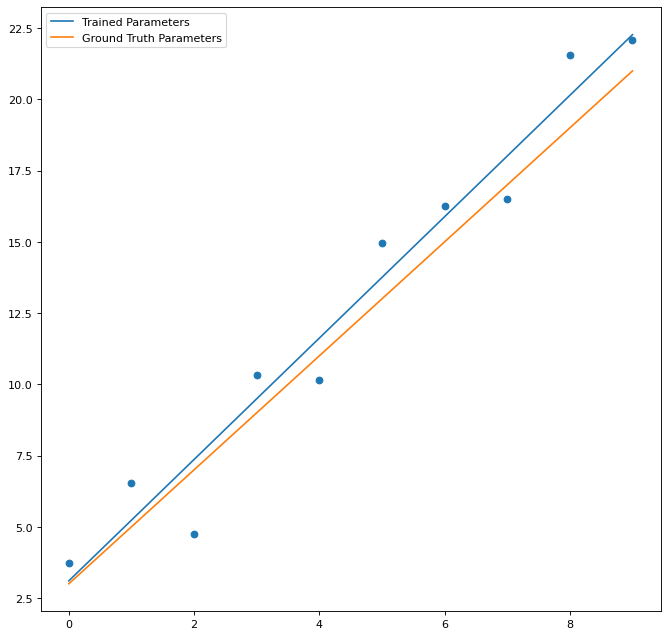

In [20]:
def visualize_2d(x, observed_y, trained_w, true_w):
    """ This visualize the 2D curves """
    fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(x, observed_y)
    
    pad_x = np.hstack((np.ones((x.shape[0], 1)), x))
    plt.plot(x, pad_x @ trained_w, label="Trained Parameters")
    plt.plot(x, pad_x @ true_w, label="Ground Truth Parameters")
    plt.legend()
    plt.show()

visualize_2d(x, y, w, true_w)

We can see that the trained parameters are not the same as the ground truth parameters!  
Why is that?

# 2D Linear Regression
We can modify `ground_truth_distribution` and generalize to multi-dimensional case.  
For the example below, we will try the 2D case since we can still visualize things!

In [21]:
def nd_ground_truth_distribution(x, w, noise_mean=0, noise_variance=1):
    """ This the ground truth distribution (linear function) used for generating training set (maybe test set).
    Args:
    - x (ndarray (Shape: (N, D))): A NxD matrix corresponding to the inputs. Each row correspond to an input
    - w (ndarray (Shape: (D + 1, 1))): A (D + 1)-column vector corresponding to the parameters of the linear function.
    - noise_mean (float): The mean of a Guassian distribution describing measurement noise.
    - noise_variance (float): The variance of a Guassian distribution describing measurement noise.
    
    Output:
    - y (ndarray (Shape: (N, 1))): A N-column vector corresponding to the outputs given the inputs.
    """
    num_samples = x.shape[0]
    
    # Generate noise
    noise = np.random.normal(loc=noise_mean, scale=noise_variance, size=(num_samples, 1))
    
    # Pad 1's for the bias term
    x = np.hstack((np.ones((num_samples, 1)), x))
    # Compute outputs y
    y = np.matmul(x, w) + noise
    
    return y


[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]] [[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [7 0]
 [8 0]
 [9 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [8 1]
 [9 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [7 2]
 [8 2]
 [9 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [7 3]
 [8 3]
 [9 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]
 [7 4]
 [8 4]
 [9 4]
 [0 5]
 [1 5]
 [2 5]
 [3 5]
 [4 5]
 [5 5]
 [6 5]
 [7 5]
 [8 5]
 [9 5]
 [0 6]
 [1 6]
 [2 6]
 [3 6]
 [4 6]
 [5 6]
 [6 6]
 [7 6]
 [8 6]
 [9 6]
 [0 7]
 [1 7]
 [2 7]
 [3 7]
 [4 7]
 [5 7]
 [6 7]

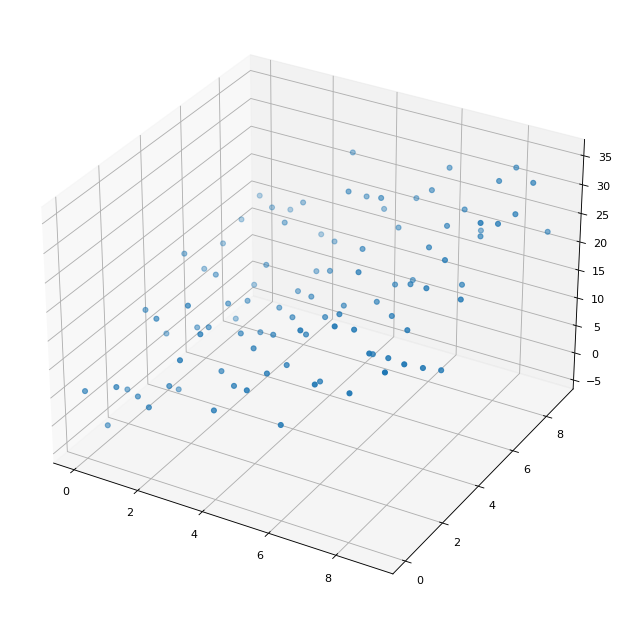

In [22]:
# Ground truth distribution
true_w = np.array([[3], [2], [1]])
noise_mean = 0
noise_variance = 5

# Generate training data
x_1, x_2 = np.meshgrid(np.arange(10), np.arange(10))
print(x_1,x_2)
x = np.vstack((x_1.flatten(), x_2.flatten())).T
print(x)
y = nd_ground_truth_distribution(x=x,
                                 w=true_w,
                                 noise_mean=noise_mean,
                                 noise_variance=noise_variance)

# Visualize the dataset
pprint([(list(input), output.item()) for input, output in zip(x, y)][:20])

fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
plt.show()

In [23]:
# The implementation previous actually already generalizes to multi-dimensional case!
# So we can simply use it to get our optimal parameters w*
w = find_optimal_parameters(x, y)
print(w)

[[2.79575567]
 [2.05889418]
 [1.06331705]]


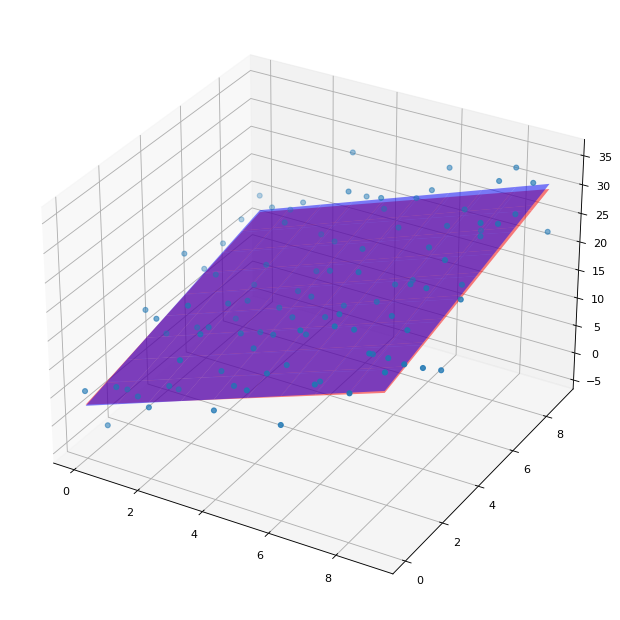

In [24]:
def visualize_3d(x, observed_y, trained_w, true_w, grid_shape=(10, 10)):
    """ This visualize the 3D curves """
    pad_x = np.hstack((np.ones((x.shape[0], 1)), x))
    trained_y = (pad_x @ trained_w).reshape(grid_shape)
    true_y = (pad_x @ true_w).reshape(grid_shape)
    
    fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], observed_y)
    x_1 = x[:, 0].reshape(grid_shape)
    x_2 = x[:, 1].reshape(grid_shape)
    ax.plot_surface(x_1, x_2, trained_y, alpha=0.5, color="blue")
    ax.plot_surface(x_1, x_2, true_y, alpha=0.5, color="red")

    plt.show()

visualize_3d(x, y, w, true_w)

Again, the trained parameters are not the same as the ground truth parameters!  

In [25]:
print(np.ones((9 + 1, 1), dtype=np.float))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
